# Discord Data Hypothesis Testing

### Introduction to the Data
The dataset used is a dataset of the message histories of Vincent and Kevin on a particular server/direct message on Discord.  
Any message log on discord is recorded as a csv with the following attributes:  
1. Their ID's
1. Their Timestamp
1. Their Contents of the message
    - Contents are usually just the words in the message or any mentions
1. Their Attachments of the message
    - A message may not have any attachments

The follow attributes extracted from the data are as follows:
1. ID of the message
    - The higher the ID, the older the message
1. Timestamp of the message
    - Timestamps consist of the following:
        - The Date of the message
        - The exact time of the message
1. The length of the message
    - We find the length by how many characters there are in the in the message
1. Punctuation count of the message
    - Any of the following count as punctuation in the dataset: `., ?, !`

### Cleaning the Data
Since the attributes we are taking are the `ID, Timestamp, message length, and punctuation`, we need to clean the data to get a dataset with these attributes.

In [13]:
import pandas as pd

file = "messages"

channel_df = pd.read_csv(file + ".csv", index_col="ID")             # read in the discord dataset

length = []                     # list to keep all the len of all messages
punct = []                      # list to keep all punct of all messages

for message in channel_df["Contents"]:
    msg = str(message)          # current content in message
    length.append(len(msg))     # length of the message
    count = 0                   # will hold punctuation count
    if "." in msg or "!" in msg or "?" in msg:
        count += msg.count(".") + msg.count("!") + msg.count("?")
    punct.append(count)

# set values in the data
channel_df["Message Length"] = length                               # inserting a column for message len
channel_df["Punctuation Count"] = punct                             # inserting a column for punct count
channel_df.drop(columns=["Contents", "Attachments"], inplace=True)  # removing unused columns of data
channel_df.to_csv(file + "_cleaned.csv")                            # save the dataset to a file

print(channel_df)

                                           Timestamp  Message Length  \
ID                                                                     
886368172259823626  2021-09-11 21:50:40.191000+00:00              25   
886368155776217138  2021-09-11 21:50:36.261000+00:00              25   
886124701859078165  2021-09-11 05:43:12.324000+00:00              14   
886124680203882526  2021-09-11 05:43:07.161000+00:00               3   
885205982018424892  2021-09-08 16:52:32.445000+00:00               4   
...                                              ...             ...   
229739861148434432  2016-09-25 23:04:11.258000+00:00              49   
229739761722458112  2016-09-25 23:03:47.553000+00:00              50   
229734380916965377  2016-09-25 22:42:24.669000+00:00              43   
229733647358492673  2016-09-25 22:39:29.775000+00:00              27   
229733601850163211  2016-09-25 22:39:18.925000+00:00              10   

                    Punctuation Count  
ID                     

### Visualize the Data
#### Length of Messages
With the dataset above, we want to see how the long messages are over the years

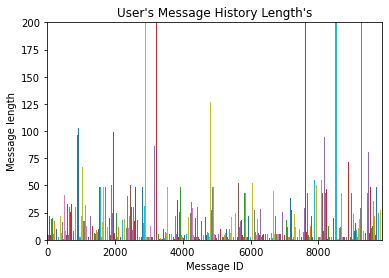

In [14]:
import matplotlib.pyplot as plt

# visualizing the length of messages
df = pd.read_csv(file + "_cleaned.csv")
plt.figure()
i = 1

for length in df["Message Length"]:
    plt.bar([i], [length])
    i += 1

plt.xlim(0, len(df) + 1)
plt.ylim(0, 200)
plt.xlabel("Message ID")
plt.ylabel("Message length")
plt.title("User's Message History Length's")
plt.show()

#### Punctuation of Messages
Now we want to see how our punctuation is over the years

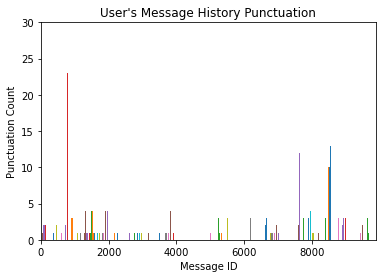

In [18]:
# visualizing the punctuation count in a user's message history
df = pd.read_csv(file + "_cleaned.csv")
plt.figure()
i = 1

for length in df["Punctuation Count"]:
    plt.bar([i], [length])
    i += 1
    
plt.xlim(0, len(df) + 1)
plt.ylim(0, 30)
plt.xlabel("Message ID")
plt.ylabel("Punctuation Count")
plt.title("User's Message History Punctuation")
plt.show()

# Data Analysis

### What we want to know
With the cleaned data, we want to dive into a few things.
1. We want to aggregate our data to see the significant statistics of our data.
    - We will also just do a data analysis and create assumptions to test.
1. We want to compare our punctuation by years.
    - We will need to split the data by year.
    - We want to statistically compare two different years.
    - For this test, we will compare the earliest year's punctuation and the latest year's punctuation and see how they differ.
        - We will do this test per for both datasets
        - After the test, we will analyze what it means for our punctuation to change over time.
    
1. We want to compare each other's message lengths over time.
    - We want to see who's message length over the amount of messages is greater.
    - For this test, we want to assume that Vincent's average word count is more than Kevin's average word count.

### Aggregating the Data

### Comparing Punctuation

### Comparing Message Lengths

# Classification

# Conclusion